In [6]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [4]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [3]:
image = cv2.imread('../img/original/img7.jpg')

In [4]:
image.shape

(1080L, 1920L, 3L)

In [5]:
import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

b             g             r
count  2.073600e+06  2.073600e+06  2.073600e+06
mean   1.103305e+02  1.364900e+02  1.345210e+02
std    3.635875e+01  3.786537e+01  4.354780e+01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    8.600000e+01  1.180000e+02  1.120000e+02
50%    1.020000e+02  1.430000e+02  1.380000e+02
75%    1.260000e+02  1.600000e+02  1.620000e+02
max    2.550000e+02  2.550000e+02  2.550000e+02

In [6]:
# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize to a third of the size
image = cv2.resize(image, None, fx=1/3, fy=1/3)

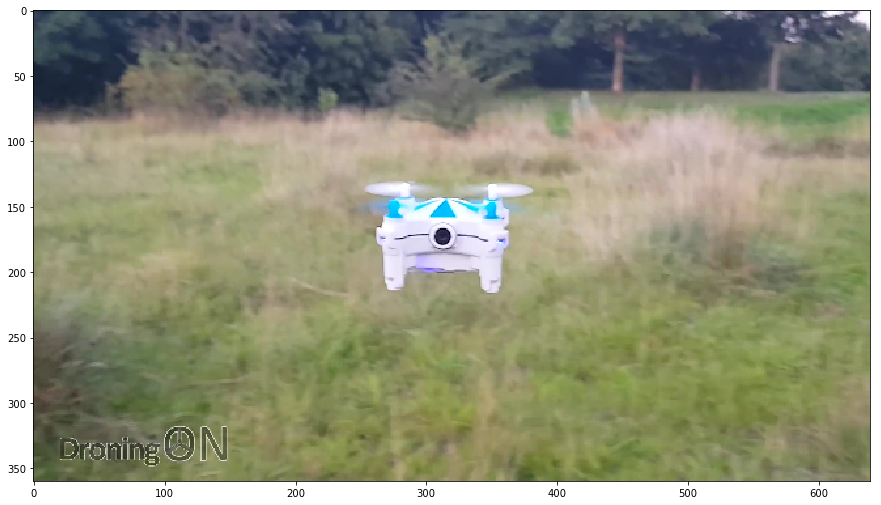

In [7]:
show(image)

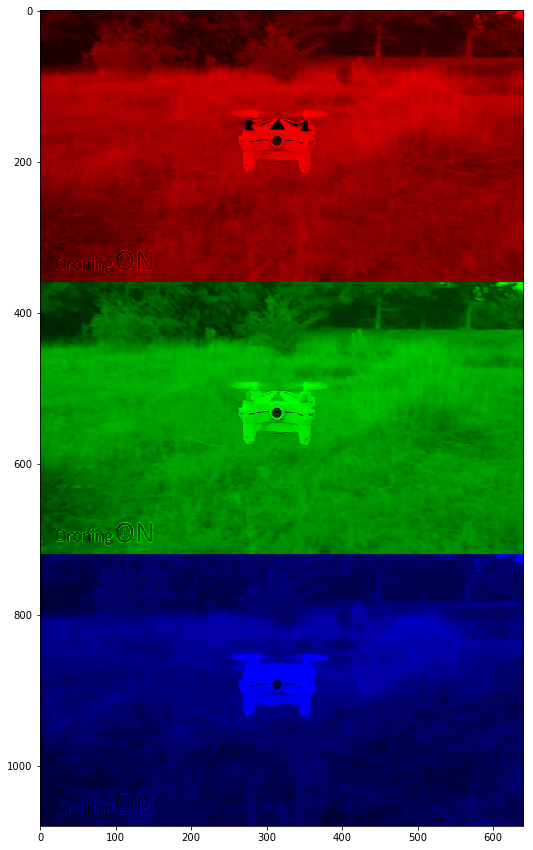

In [8]:
# Show Red/Green/Blue
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

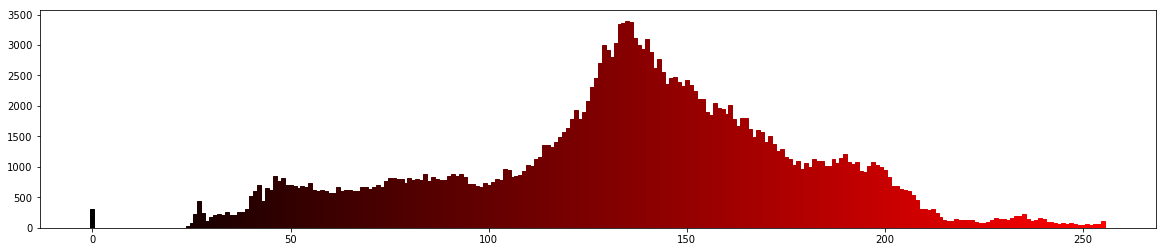

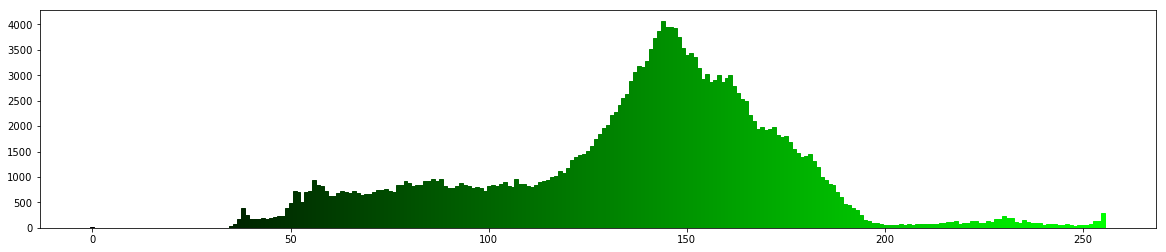

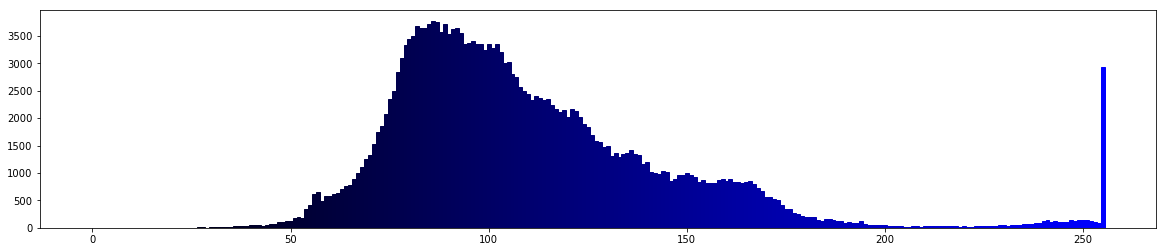

In [9]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
#         plt.plot(histr, color=c, lw=2)
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        
        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
#         plt.xlim([0, 256])

        plt.show()
    
show_rgb_hist(image)

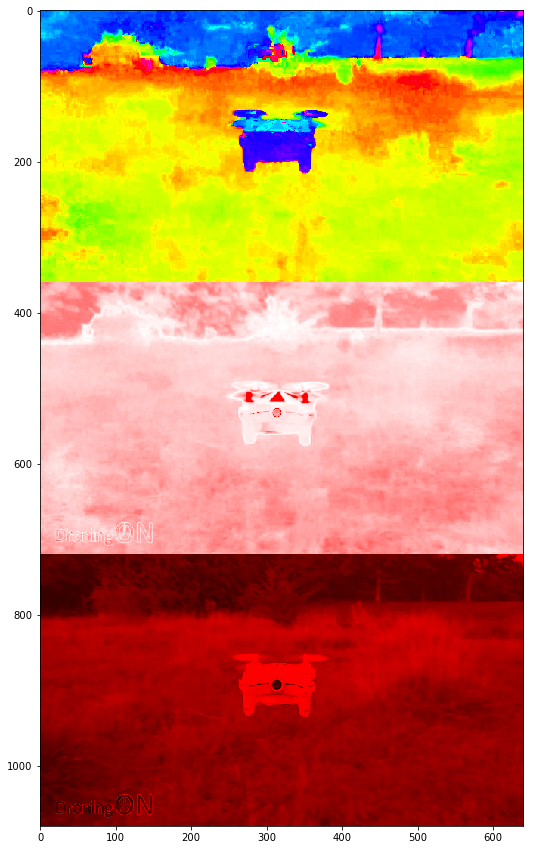

In [10]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

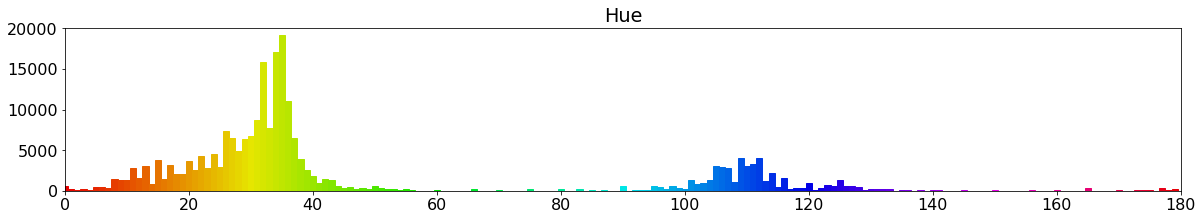

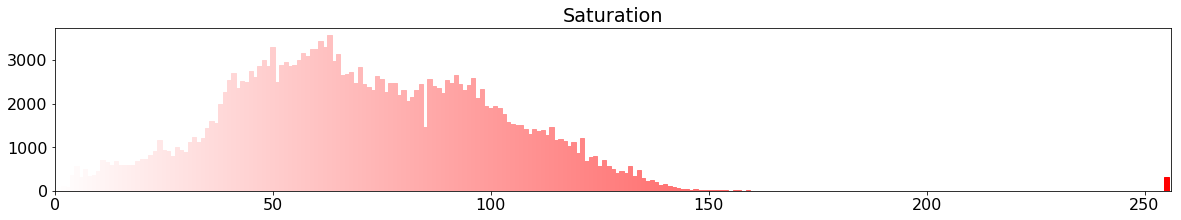

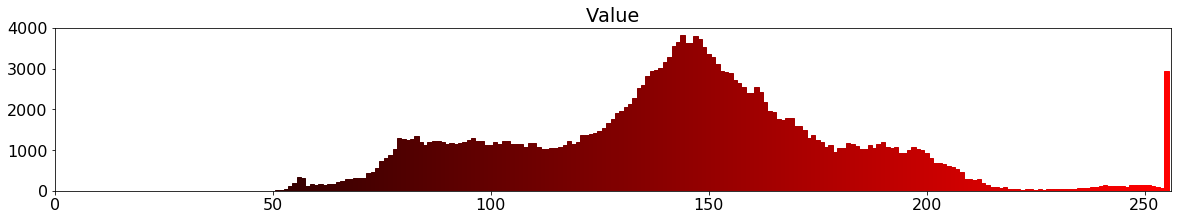

In [11]:
matplotlib.rcParams.update({'font.size': 16})

def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
    plt.bar(range(0, 180), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Value')
    
show_hsv_hist(hsv)

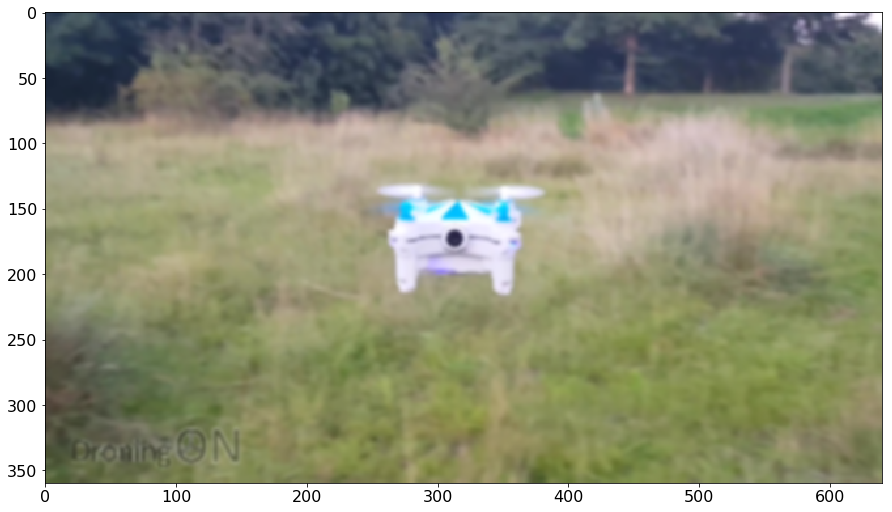

In [12]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

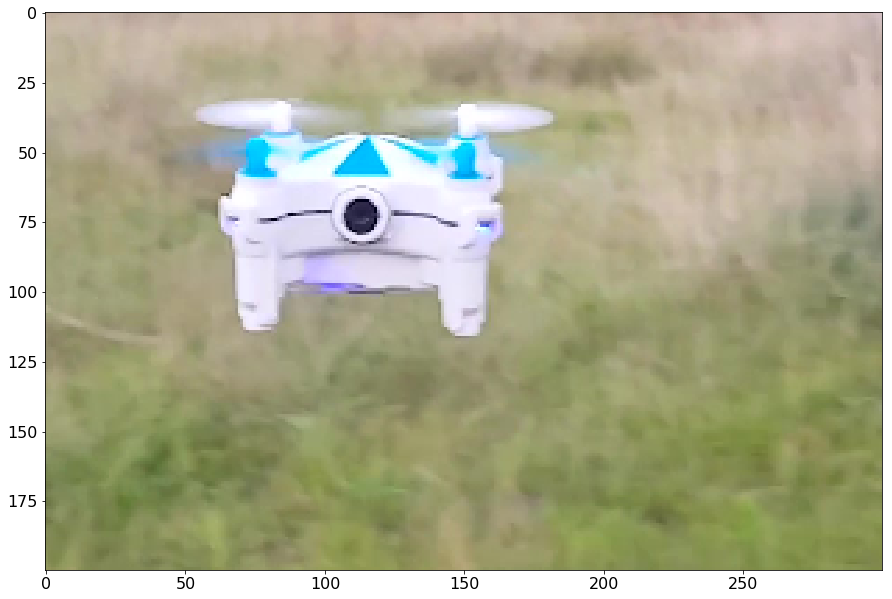

In [13]:
image_cropped = image[100:300, 200:500]
show(image_cropped)
# image_rect_hsv = cv2.cvtColor(image_rect, cv2.COLOR_RGB2HSV)
# show_hsv_hist(image_rect_hsv)

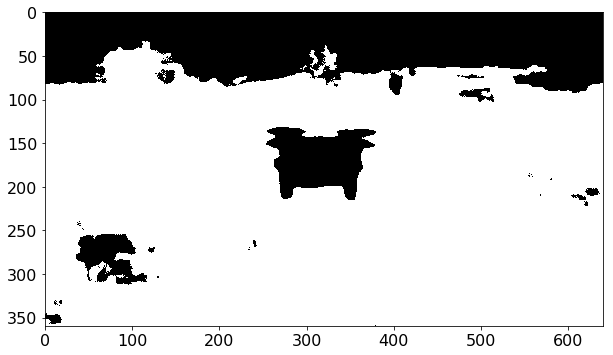

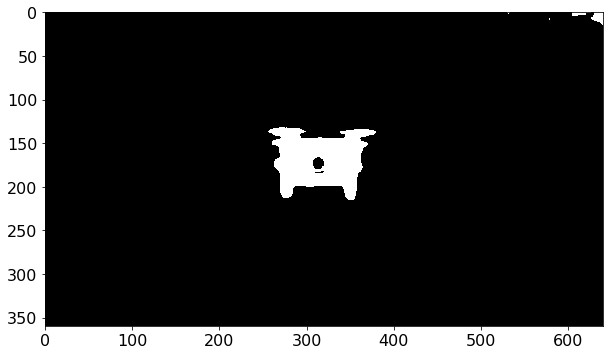

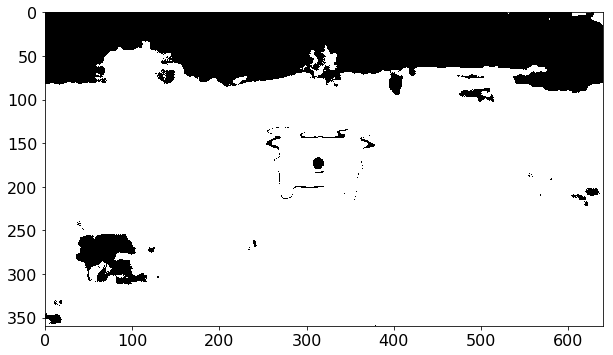

In [55]:
'''
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 0, 0])
max_red = np.array([256, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([0, 0, 0])
max_red2 = np.array([256, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)
'''

image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 0, 0])
max_red = np.array([40, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([80, 0, 180])
max_red2 = np.array([150, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

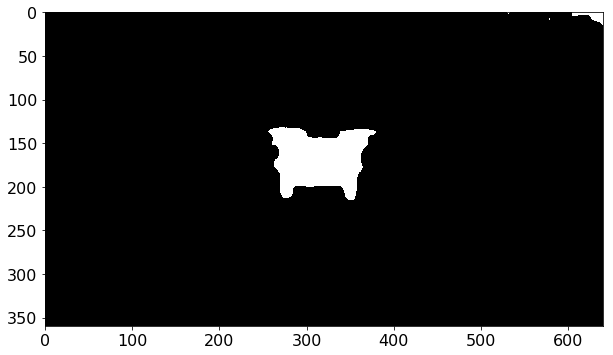

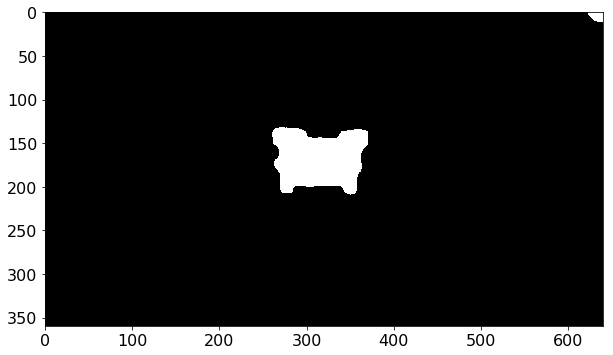

In [56]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red2, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

2


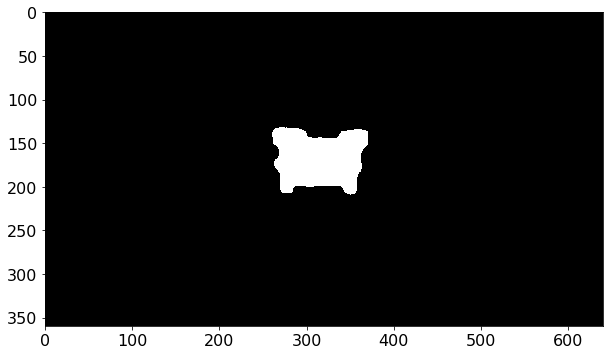

In [57]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

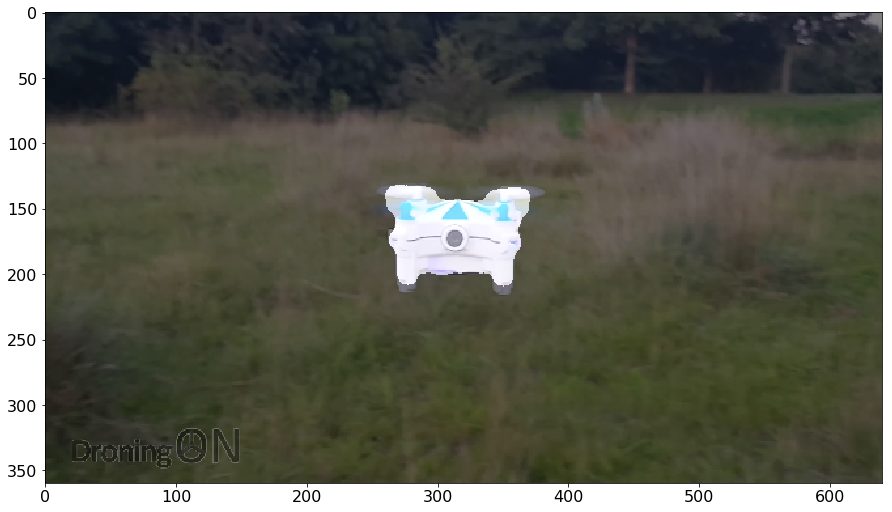

In [58]:
overlay_mask(red_mask, image)

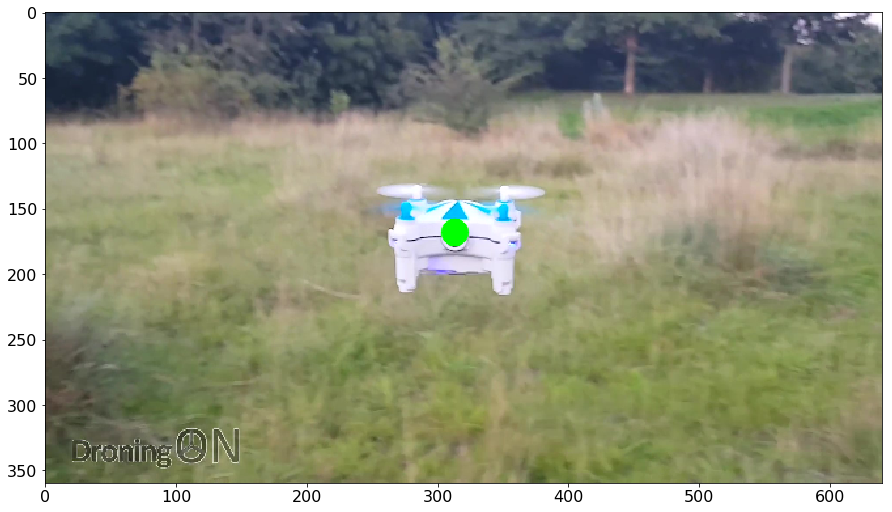

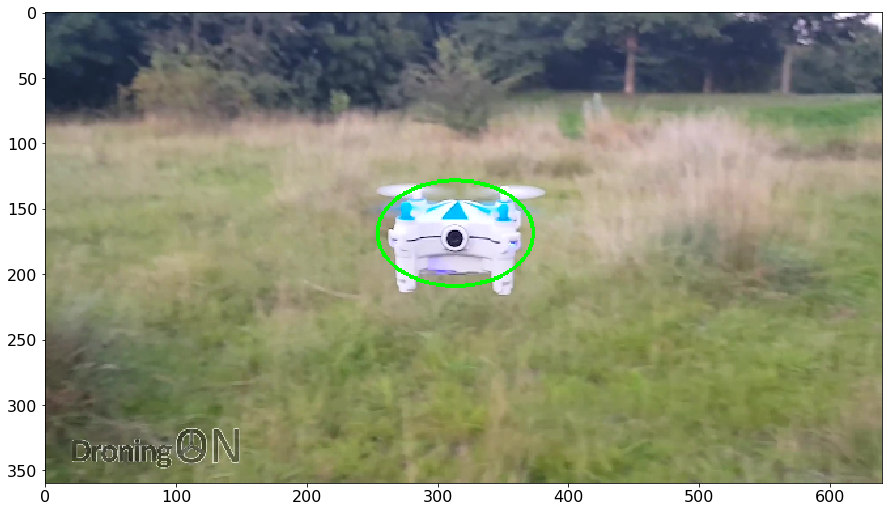

In [62]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.CV_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

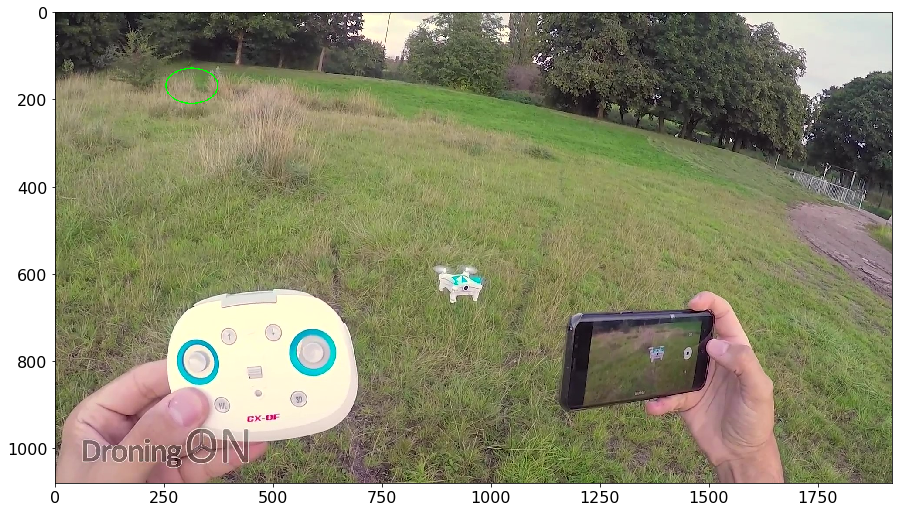

In [77]:




img = cv2.cvtColor(cv2.imread('../img/original/img10.jpg'), cv2.COLOR_BGR2RGB)


def find_biggest_contour_alt(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)





image_with_ellipse_alt = img.copy()
ellipse_alt = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse_alt, ellipse_alt, (0,255,0), 2)
show(image_with_ellipse_alt)

In [64]:
type(image.copy()), image.copy()

(numpy.ndarray, array([[[ 41,  57,  72],
         [ 42,  58,  74],
         [ 43,  59,  75],
         ..., 
         [254, 255, 255],
         [255, 254, 255],
         [255, 254, 255]],
 
        [[ 53,  69,  85],
         [ 49,  65,  81],
         [ 46,  61,  80],
         ..., 
         [254, 255, 255],
         [255, 254, 255],
         [255, 254, 255]],
 
        [[ 54,  70,  86],
         [ 52,  67,  86],
         [ 51,  66,  85],
         ..., 
         [254, 255, 255],
         [255, 254, 255],
         [255, 254, 255]],
 
        ..., 
        [[ 97, 108,  66],
         [ 92, 105,  62],
         [ 90, 103,  60],
         ..., 
         [133, 130,  97],
         [139, 137,  99],
         [142, 139,  98]],
 
        [[ 89, 100,  58],
         [ 86,  99,  56],
         [ 84,  97,  54],
         ..., 
         [131, 131,  97],
         [137, 135,  96],
         [139, 138,  94]],
 
        [[ 84,  95,  53],
         [ 82,  95,  52],
         [ 81,  94,  51],
         ..., 
        

In [66]:
img = cv2.imread('../img/original/img1.jpg')
img

array([[[ 83,  65,  72],
        [ 83,  65,  72],
        [ 82,  64,  71],
        ..., 
        [211, 254, 255],
        [211, 254, 255],
        [211, 254, 255]],

       [[ 82,  64,  71],
        [ 82,  64,  71],
        [ 82,  64,  71],
        ..., 
        [211, 254, 255],
        [211, 254, 255],
        [211, 254, 255]],

       [[ 82,  64,  71],
        [ 82,  64,  71],
        [ 81,  63,  70],
        ..., 
        [211, 254, 255],
        [211, 254, 255],
        [211, 254, 255]],

       ..., 
       [[ 79, 110, 103],
        [ 93, 124, 117],
        [100, 131, 124],
        ..., 
        [ 41,  87,  75],
        [ 47,  94,  85],
        [ 56, 103,  94]],

       [[ 73, 104,  97],
        [ 89, 120, 113],
        [101, 132, 125],
        ..., 
        [ 27,  72,  63],
        [ 44,  89,  80],
        [ 60, 105,  96]],

       [[ 70, 101,  94],
        [ 76, 107, 100],
        [ 89, 120, 113],
        ..., 
        [ 19,  64,  55],
        [ 42,  87,  78],
        [ 71, 116,

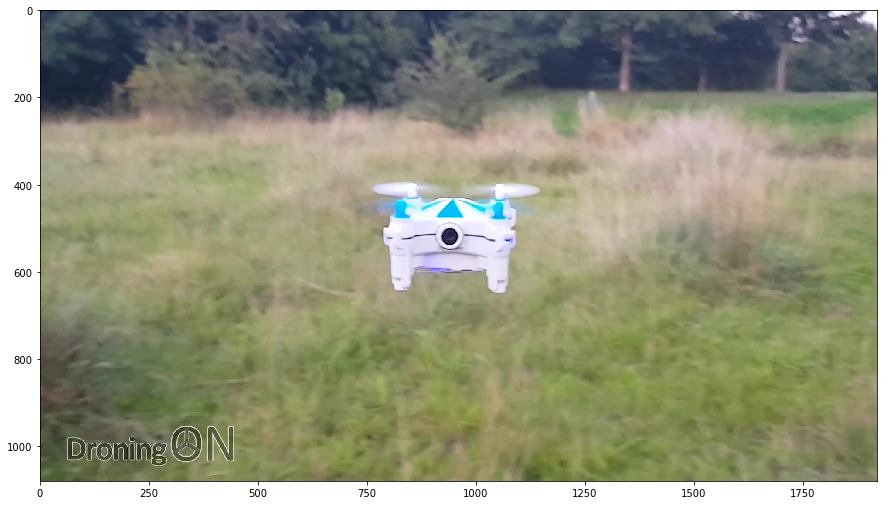

In [7]:
image2 = cv2.imread('../img/original/img7.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
show(image2)